DatasetSineWave(batch_size=8, sample_rate=20, duration=5, num_samples_pred=1, seed=1, frequencies=[5, 10])


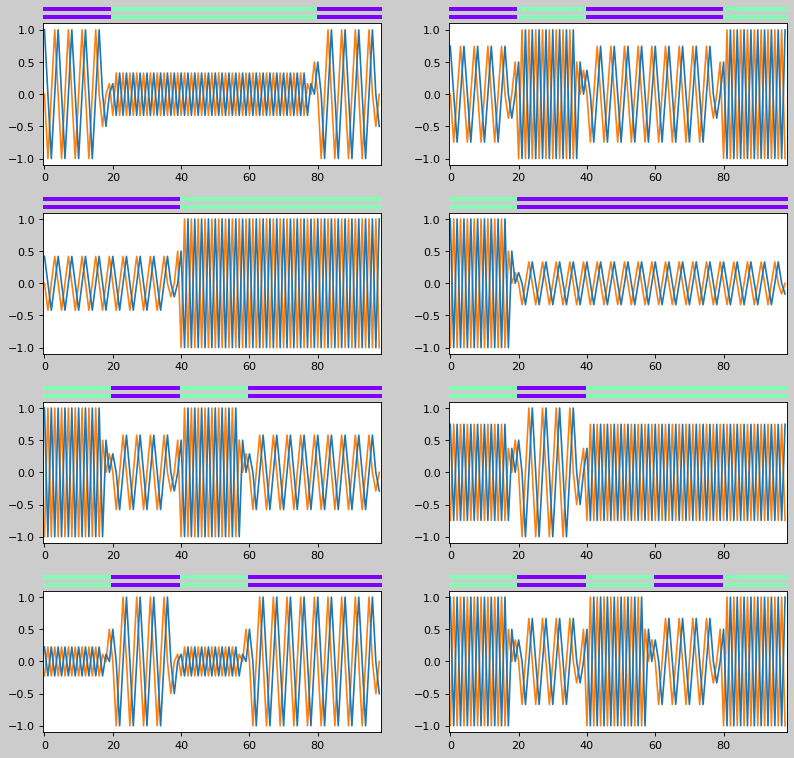

In [264]:
import numpy as np
import librosa
import torch
from math import ceil
from typing import Sequence, Union, Optional
from torch.utils.data import IterableDataset
import importlib
import data
importlib.reload(data)
DatasetSineWave = data.DatasetSineWave

batch_size = 8
num_samples_pred = 1
frequencies = [5, 10]
torch.cuda.is_available = lambda : False
to_numpy = lambda v: v.detach().cpu().numpy()

dataset = DatasetSineWave(num_samples_pred, frequencies, batch_size, sample_rate=20, seed=1)
print(dataset)
x, y, m = next(iter(dataset))

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(nrows=ceil(batch_size/2), ncols=2, figsize=(12, batch_size*3//2), dpi=80, facecolor='#ccc')
ax = ax.flatten()
for i in range(batch_size):
    ax[i].plot(to_numpy(x[i]))
    ax[i].plot(to_numpy(y[i]), zorder=-1)
    divider = make_axes_locatable(ax[i])
    block_ax = divider.append_axes("top", size=0.05, pad=0.05, sharex=ax[i])
    block_ax.imshow(to_numpy(m[i]).reshape(1,-1),
                    aspect='auto', cmap='rainbow', interpolation='none',
                    vmin=0, vmax=len(frequencies))
    block_ax.set_axis_off()
    block_ax = divider.append_axes("top", size=0.05, pad=0.05, sharex=block_ax)
    block_ax.imshow(to_numpy(m[i]).reshape(1,-1),
                    aspect='auto', cmap='rainbow', interpolation='none',
                    vmin=0, vmax=len(frequencies))
    block_ax.set_axis_off()
plt.show()